In [22]:
#install libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Load the data and split it into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the dataset
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


In [24]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to add a channel dimension (for grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Print the new shape of the data to verify
print(f"Training data shape after reshaping: {x_train.shape}")
print(f"Test data shape after reshaping: {x_test.shape}")


Training data shape after reshaping: (60000, 28, 28, 1)
Test data shape after reshaping: (10000, 28, 28, 1)


In [25]:
# Convert to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolutional layer 1 + Pooling layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2 + Pooling layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


# Flatten the output for the dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Save the trained model
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.7884 - loss: 0.6431 - val_accuracy: 0.9796 - val_loss: 0.0651
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9588 - loss: 0.1435 - val_accuracy: 0.9846 - val_loss: 0.0477
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9705 - loss: 0.1009 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9756 - loss: 0.0814 - val_accuracy: 0.9898 - val_loss: 0.0331
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9789 - loss: 0.0682 - val_accuracy: 0.9905 - val_loss: 0.0327
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9820 - loss: 0.0622 - val_accuracy: 0.9908 - val_loss: 0.0274
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9841 - loss: 0.0542 - val_accuracy: 0.9923 - val_loss: 0.0267
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9844 - loss: 0.0492 - 

Model saved as mnist_cnn_model.h5


In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.12%


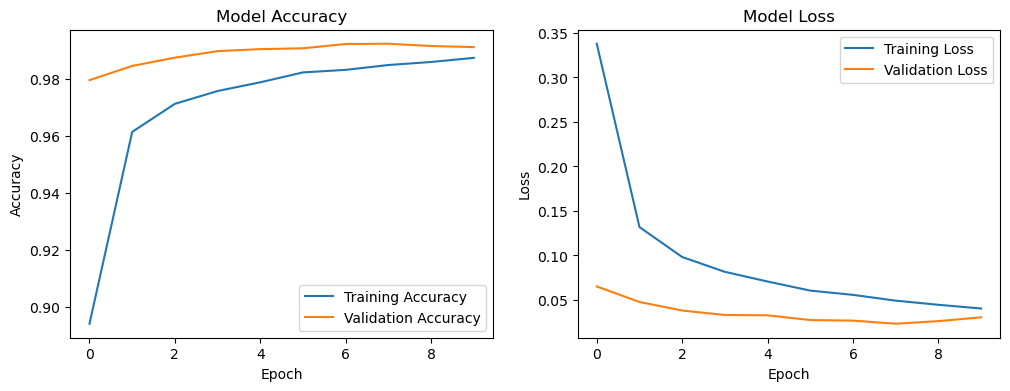

In [29]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show plots
plt.show()


In [30]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('.\\mnist_cnn_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


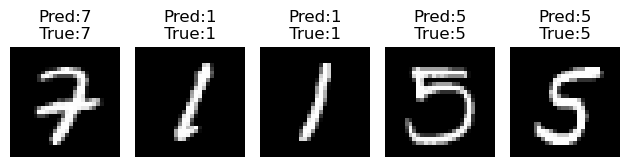

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Display 10 test images
for i in range(5):
    # Choose a test image at random
    index = np.random.randint(0, x_test.shape[0])
    test_image = x_test[index]
    true_label = np.argmax(y_test[index])

    # Add a batch dimension and make a prediction
    prediction = model.predict(test_image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    # Set text color based on whether the prediction is correct
    text_color = 'black' if true_label == predicted_label else 'red'

    # Display the result
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of images
    plt.imshow(test_image.reshape(28, 28), cmap='gray')
    plt.title(f"Pred:{predicted_label}\n True:{true_label} ", color=text_color)
    plt.axis('off')

# Show all the images
plt.tight_layout()
plt.show()